# Ejemplo 1 - Funcion exponencial

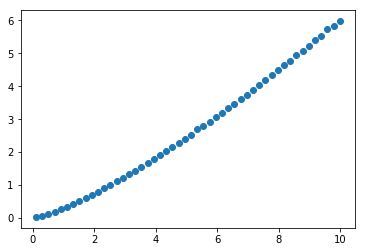

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf')

x = np.linspace(0.1, 10)
y = 0.3 * x ** 1.3
y += 0.001 * y * np.random.chisquare(3, size=y.shape)

plt.figure()
plt.scatter(x, y)
plt.show()

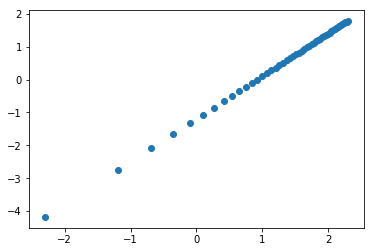

In [2]:
X = np.log(x)
Y = np.log(y)

plt.figure()
plt.scatter(X, Y)
plt.show()

Si, $$ y = Ax^n $$ entonces $$ \log y = \log A + n \log x $$

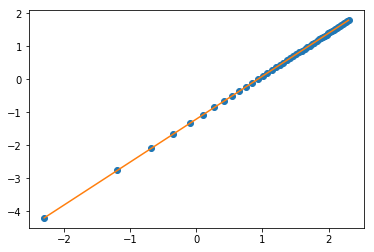

In [3]:
from scipy.stats import linregress

pendiente, intercepto, *otros = linregress(X, Y)

plt.figure()
plt.plot(X, Y, 'o')
plt.plot(X, pendiente * X + intercepto)
plt.show()

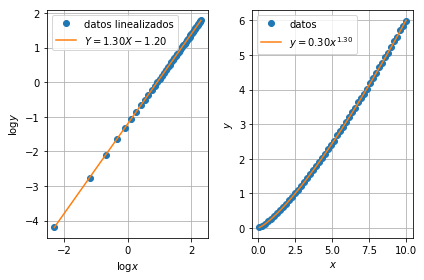

In [4]:
plt.figure()
plt.subplot(121)
plt.plot(X, Y, 'o', label='datos linealizados')
plt.plot(X, pendiente * X + intercepto,
         label=f'$Y = {pendiente:.2f} X {intercepto:+.2f}$')
plt.xlabel(r'$\log x$')
plt.ylabel(r'$\log y$')
plt.grid()
plt.legend()

# Calculamos A y n

A = np.exp(intercepto)
n = pendiente

plt.subplot(122)

plt.plot(x, y, 'o', label='datos')
plt.plot(x, A * x ** n,
         label=f'$y = {A:.2f}x^{{{n:.2f}}}$')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()

# Ejemplo 2 - Funcion cuadratica

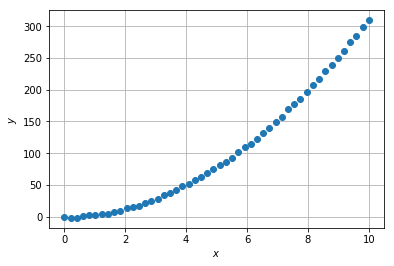

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 10)
y = 3.1 * x ** 2
y += np.random.normal(size=y.shape)

plt.figure()
plt.plot(x, y, 'o')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.grid()
plt.show()

In [6]:
# para que es la r?
print('\n\ {intercepto}')
print('---')
print(r'\n\ {intercepto}')
print('---')
print(f'\n\ {intercepto}')
print('---')
print(rf'\n\ {intercepto}')


\ {intercepto}
---
\n\ {intercepto}
---

\ -1.2012880167557538
---
\n\ -1.2012880167557538


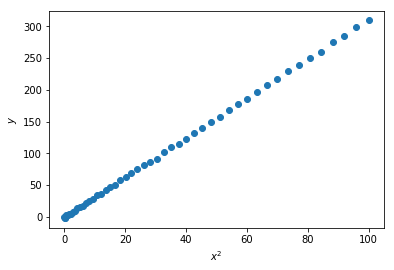

In [7]:
X = x ** 2
Y = y

plt.figure()
plt.scatter(X, Y)
plt.xlabel('$x^2$')
plt.ylabel('$y$')
plt.show()

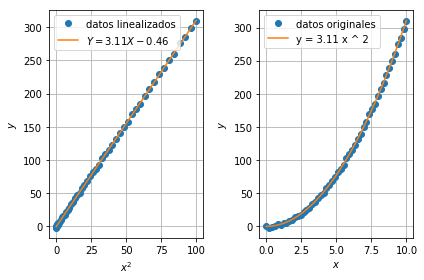

In [8]:
from scipy.stats import linregress

m, b, *otros = linregress(X, Y)

plt.figure()
plt.subplot(121)
plt.plot(X, Y, 'o', label='datos linealizados')
plt.plot(X, m * X + b, label=f'$Y = {m:.2f} X {b:+.2f}$')
plt.grid()
plt.legend()
plt.xlabel('$x^2$')
plt.ylabel('$y$')

# A -> la pendiente

A = m

plt.subplot(122)
plt.plot(x, y, 'o', label='datos originales')
plt.plot(x, A * x ** 2, label=f'y = {A:.2f} x ^ 2')
plt.grid()
plt.legend()
plt.xlabel('$x$')
plt.ylabel('$y$')

plt.tight_layout()
plt.show()

# Ajuste polinomial

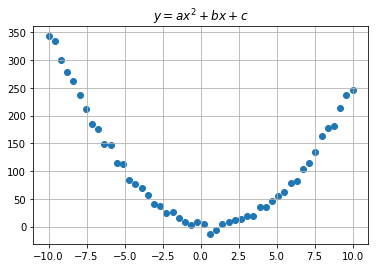

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-10, 10)
y = 3 * x ** 2 - 5 * x + 3
y += np.random.normal(0, 5, size=y.shape)

plt.figure()
plt.scatter(x, y)
plt.grid()
plt.title('$y = a x ^ 2 + b x + c$')
plt.show()

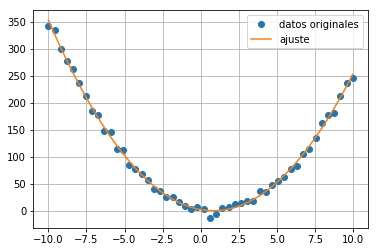

In [10]:
coeficientes = np.polyfit(x, y, 2)

plt.figure()
plt.plot(x, y, 'o', label='datos originales')
plt.plot(x, np.polyval(coeficientes, x), label='ajuste')
plt.grid()
plt.legend()
plt.show()

# Ajuste con funcion objetivo

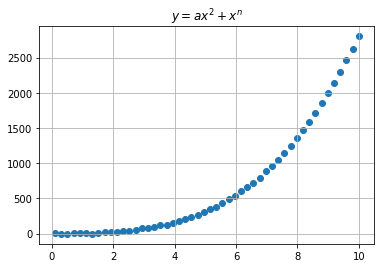

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0.1, 10)
y = 3 * x ** 2 + x ** 3.4
y += np.random.normal(0, 5, size=y.shape)

plt.figure()
plt.scatter(x, y)
plt.grid()
plt.title('$y = a x ^ 2 + x ^ n$')
plt.show()

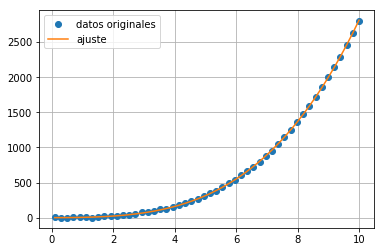

In [12]:
def objetivo(x, a, n):
    return a * x ** 2 + x ** n

from scipy.optimize import curve_fit

popt, pcov = curve_fit(objetivo, x, y, p0=(1, 1))

plt.figure()
plt.plot(x, y, 'o', label='datos originales')
plt.plot(x, objetivo(x, *popt), label='ajuste')
plt.grid()
plt.legend()
plt.show()

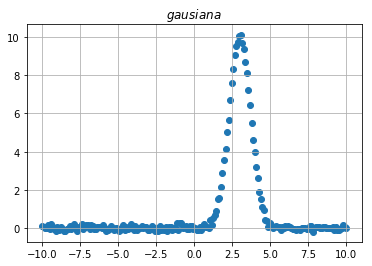

In [13]:
def gausiana(x, amp, mu, sigma):
    return amp * np.exp(-(x - mu)**2 / sigma ** 2)

x = np.linspace(-10, 10, 200)
y = gausiana(x, 10, 3, 1)
y += np.random.normal(0, 0.1, size=y.shape)

plt.figure()
plt.scatter(x, y)
plt.grid()
plt.title('$gausiana$')
plt.show()

[ 10.05264138   2.9965827    1.000441  ]


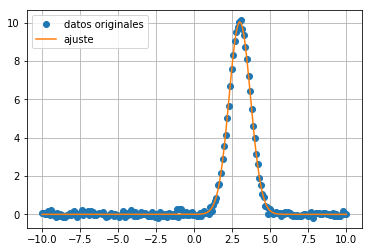

In [14]:
popt, pcov = curve_fit(gausiana, x, y)

print(popt)

plt.figure()
plt.plot(x, y, 'o', label='datos originales')
plt.plot(x, gausiana(x, *popt), label='ajuste')
plt.grid()
plt.legend()
plt.show()